# Distribution Plots

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [4]:
# seaborn comes with some datasets for us to use
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


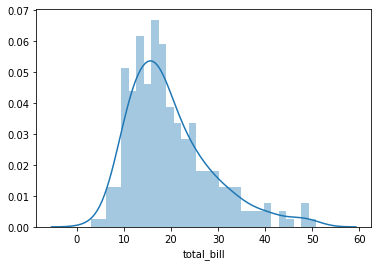

In [7]:
# Distribution plots are basically histograms
sns.distplot(tips['total_bill'], bins=30)

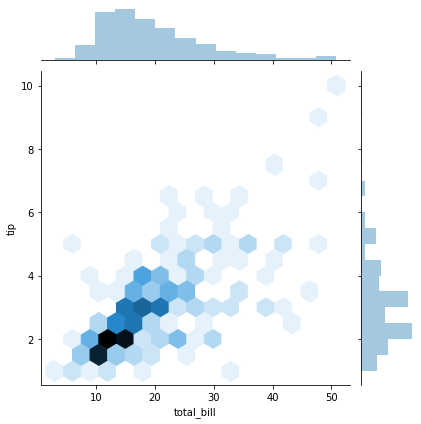

In [10]:
# Joint plots allow you to basically combine two distribution plots
# Say you want to compare the distribution of the total bill and tip size
# X and Y are column names you want to compare
# Data is where X and Y are location
# Joint Plot also has a kind parameter
# Kind allows you to change what is going on in the box
# Default kind is scatter
# Other kinds are hex, reg, kde
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

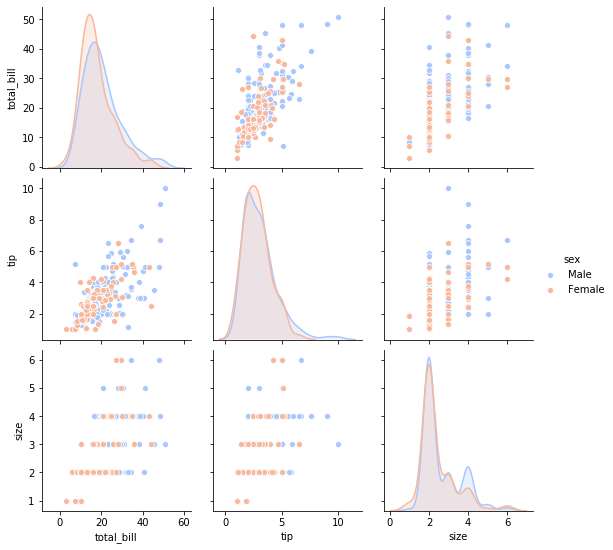

In [16]:
# Pair Plot
# Great way to visulize data
# Going ot plot pairwise relationships across an entire dataframe for numerical columns
# Has a hue argument for categorical columns
# Pair plot is going to do a joint plot for every single possible 
# combination of the numerical column in the dataframe
sns.pairplot(tips, hue='sex', palette='coolwarm')

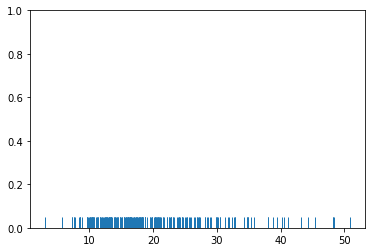

In [17]:
# Rug Plots
# It draws a dash mark for every point in the variable
# A histogram would effectively count the number of dashes
sns.rugplot(tips['total_bill'])

In [ ]:
# We can build off the Rug plot to better understand KDE
# The KDE is the line that appears on the distribution plot
# KDE stands for Kernal Density Estimation
# Separate Gaussian distribution on every point
# Sum up the gaussian distributions

# Categorical Data

In [21]:
import seaborn as sns
import numpy as np
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


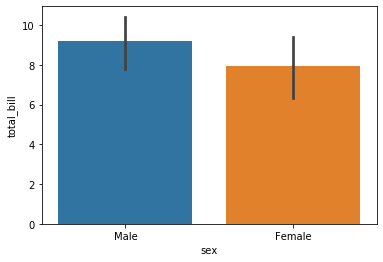

In [23]:
# Bar plot
# By default, it is showing the mean for each category
# Controlled by estimator
# Can change the estimator to other items, including your own functions
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

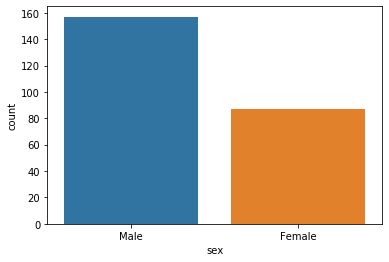

In [24]:
# Count plot
# Similar to a bar pot but it is counting the number of occurences
sns.countplot(x='sex', data=tips)

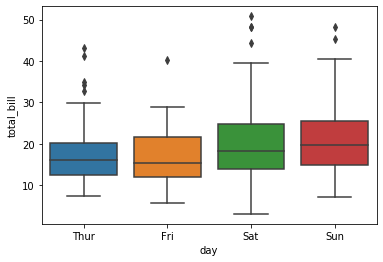

In [25]:
# Box Plots and Violin Plots
# Used to show the ditribution of categorical data
# The dots are outliers
sns.boxplot(x='day', y='total_bill', data=tips)

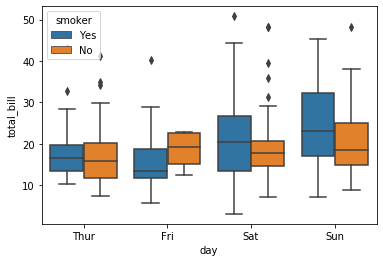

In [26]:
# we can get fancy by adding a hue arguement
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker')

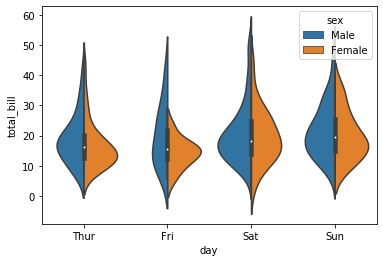

In [29]:
# Violin plot
# Allow us to plot components that correspond to data points
# Essentially showing the KDE of the underlying distribution
# This allows you to learn more information about the data itself
# At the cost that it is a little more difficult to read 
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

C:\Users\Jared\anaconda3\lib\site-packages\seaborn\categorical.py:2784: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


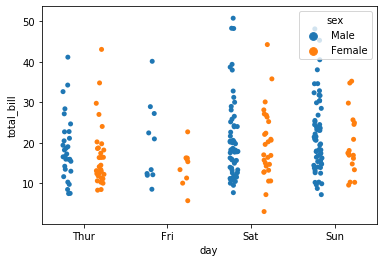

In [33]:
# Strip Plot
# Draws a scatter plot where one variable is categorical
sns.stripplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

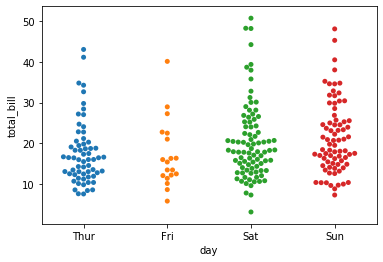

In [34]:
# Swarm Plot
# Combines strip plot and violin plot
# points don't overlap
# Gives a better representation of the distribution of values
# Sometimes don't scale well if you have a large number of points
sns.swarmplot(x='day', y='total_bill', data=tips)

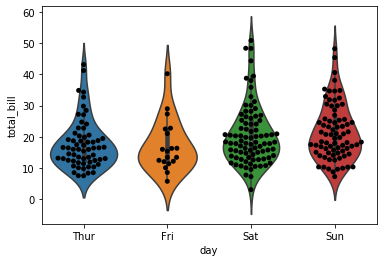

In [35]:
# Swarm plots can be combined with a violin plot
# Probably best for exploratory data analysis
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')

C:\Users\Jared\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


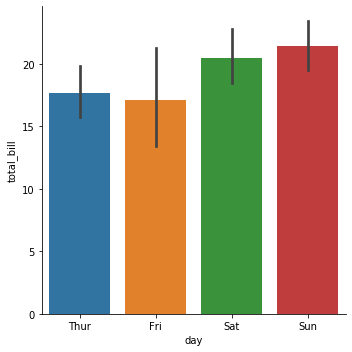

In [37]:
# Factor Plot
# This is just a general plotting and you specify the kind
sns.factorplot(x='day', y='total_bill', data=tips, kind='bar')

# Matrix Plots

In [39]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [43]:
# For a heat map to work properly, the data should already be in a matrix form
# This means that the rows and columns need to be variables
# The rows just cant be index values
# This is the matrix form you will need your data in to make a heat map
tc = tips.corr()

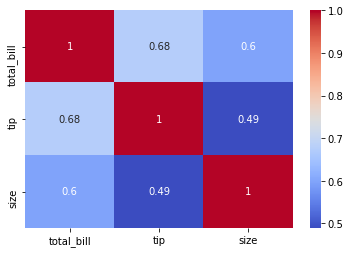

In [45]:
sns.heatmap(tc, annot=True, cmap='coolwarm')

In [48]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [49]:
fp = flights.pivot_table(index='month', columns='year', values='passengers')

In [50]:
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


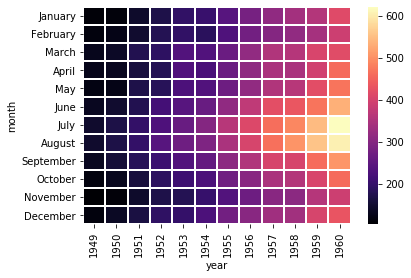

In [55]:
sns.heatmap(fp, cmap = 'magma', linecolor='white', linewidths=1)

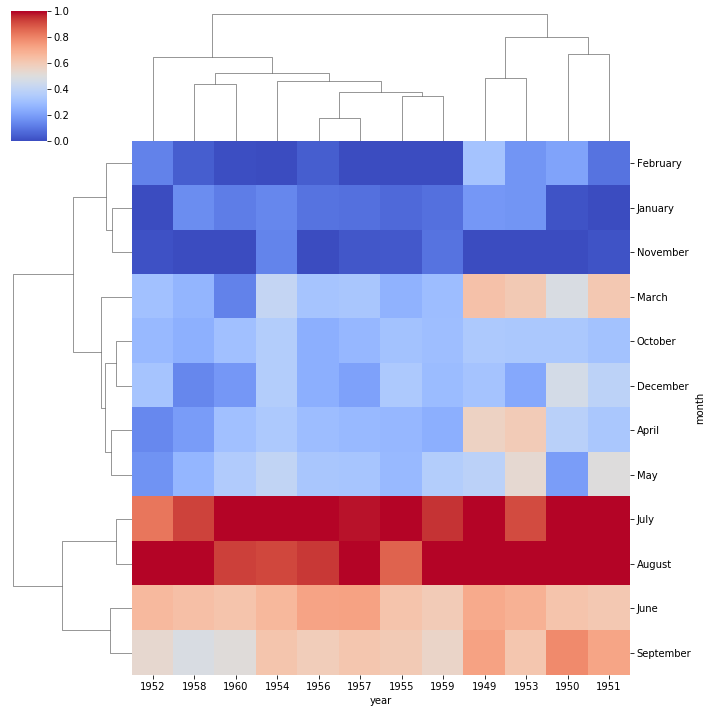

In [59]:
# Cluster Map
# Uses hierarchal clustering to create a heat map
# Using the same flight data, fp
# Notice that the months and years are no longer in order
# This is because clustermap tries to cluster similar items
# So we can that 1959 and 1960 are similar
# As well as August and July
sns.clustermap(fp, cmap='coolwarm', standard_scale = 1)

# Grids

In [69]:
# How to use the Grids capability to automate subplots based off of 
# features in our data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [70]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

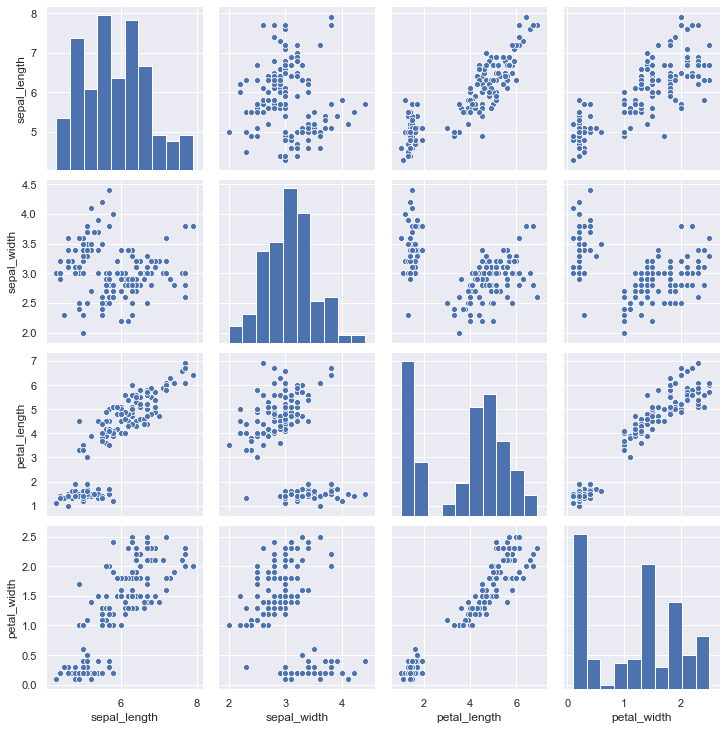

In [71]:
# Pair plot
# automated joint plot for the entire dataset
sns.pairplot(iris)

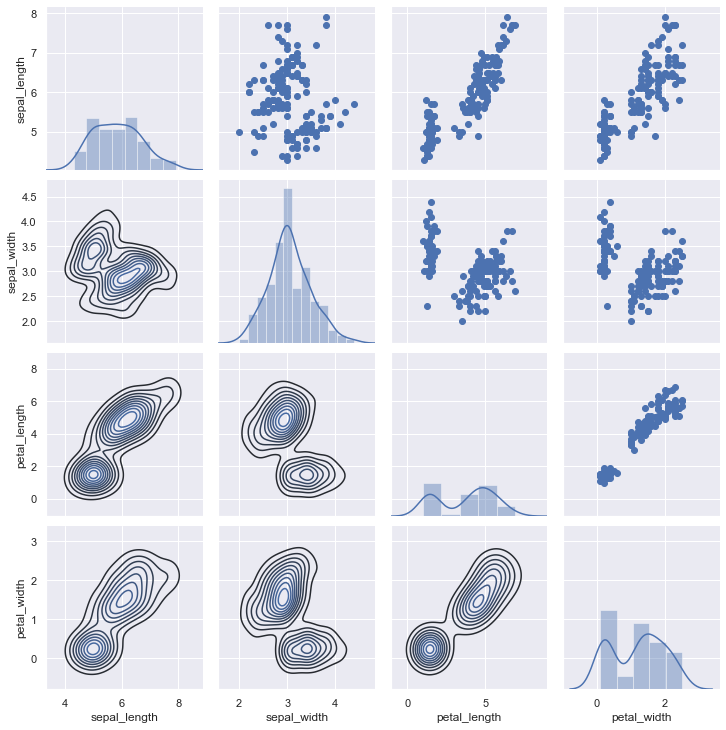

In [73]:
# Pair grid is going to give us more control over the plots that appear
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [74]:
# Facet Grid
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


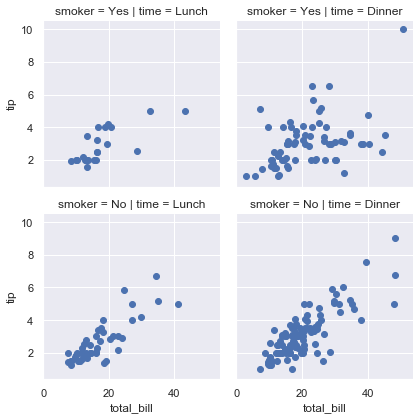

In [81]:
g = sns.FacetGrid(data=tips, col = 'time', row='smoker')
#g.map(sns.distplot,'total_bill')
# We are mapping a plot type and separating the results
# based on column and row names
# The rows are yes, no smoker
# Columns are lunch, dinner
# x-axis is total_bill

# If the plot type you are mapping requires two variables, you just pass another one
g.map(plt.scatter, 'total_bill','tip')

# Regression Plots

In [82]:
# Linear Plot Models
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


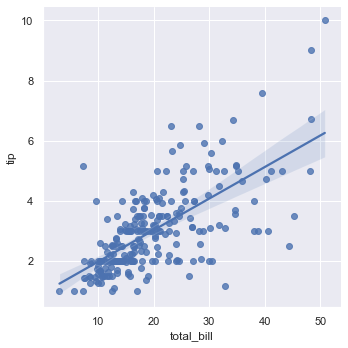

In [84]:
sns.lmplot(x='total_bill', y='tip', data=tips)
# Gives a scatter plot with a linear fit on top of it


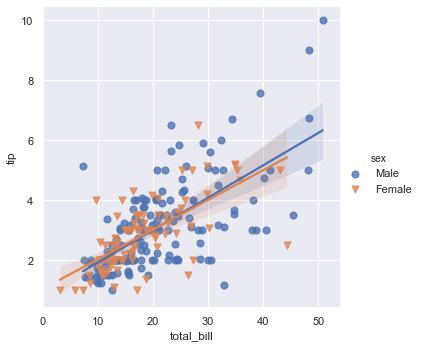

In [87]:
# Can specify hue and get two scatter plots with two regressions
# Can also pass in matplotlib type stuff
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o','v'],
          scatter_kws={'s':50})
# the scatter_kws dictionary is a call to matplotlib through seaborn to 
# change the marker size

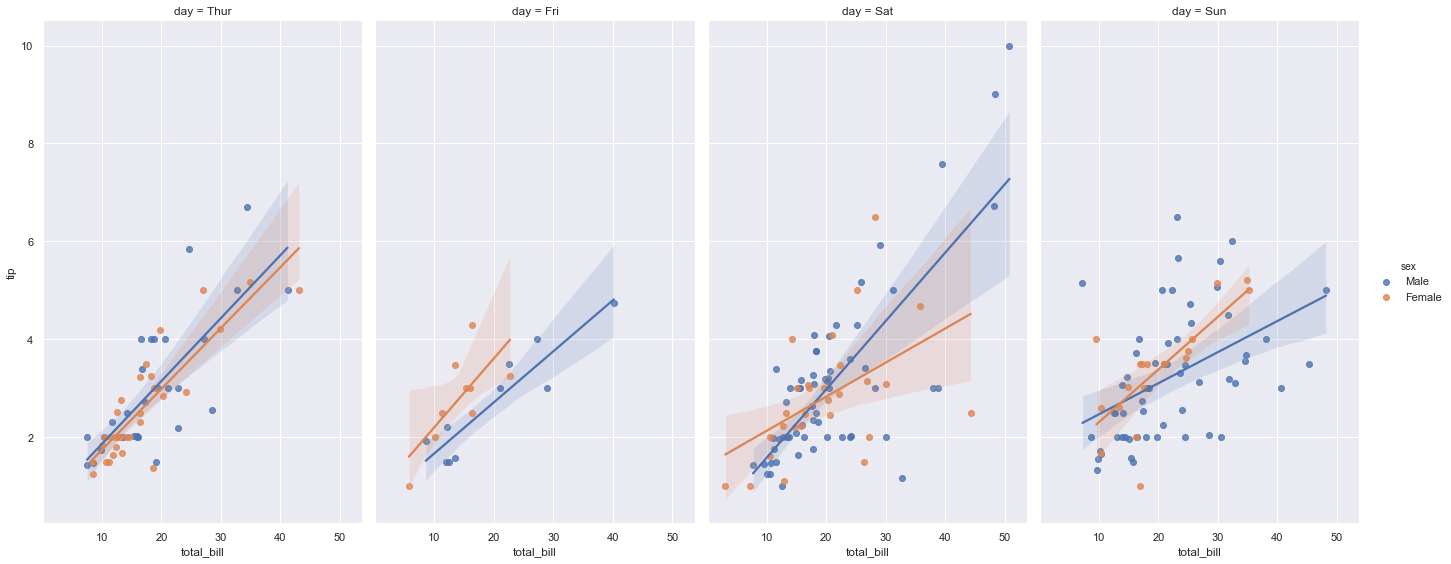

In [93]:
# We can get two separate columns and rows
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex',
          aspect=0.6, height=8)

# Style and Color

In [1]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


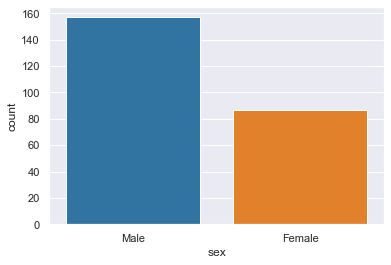

In [5]:

sns.countplot(x='sex', data=tips)

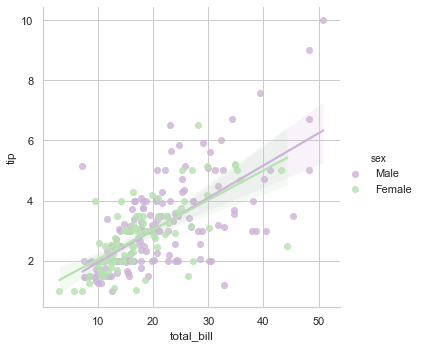

In [19]:
sns.set_style('whitegrid')
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette = 'PRGn')